In [1]:
!pip install nltk

In [2]:
import nltk

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp5cg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer
from sklearn import metrics

In [5]:
df = pd.read_csv("D:\Documentss\File SR\Sr Kuliah\Semester 7\Machine Learning\Praktikum 1\CodeSheet\ISEAR.csv", header=None)

df.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\hp5cg\AppData\Local\Temp\ipykernel_14300\696470261.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\Documentss\File SR\Sr Kuliah\Semester 7\Machine Learning\Praktikum 1\CodeSheet\ISEAR.csv", header=None)


,0,1,2
0,joy,On days when I feel close to my partner and ot...,NaN
1,fear,Every time I imagine that someone I love or I ...,NaN
2,anger,When I had been obviously unjustly treated and...,NaN
3,sadness,When I think about the short time that we live...,NaN
4,disgust,At a gathering I found myself involuntarily si...,NaN


In [6]:
col = [0,1]
new_df = df[col]
new_df = new_df[pd.notnull(df[1])]
new_df.columns = ['Emotion', 'Text']
new_df.head()

,Emotion,Text
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


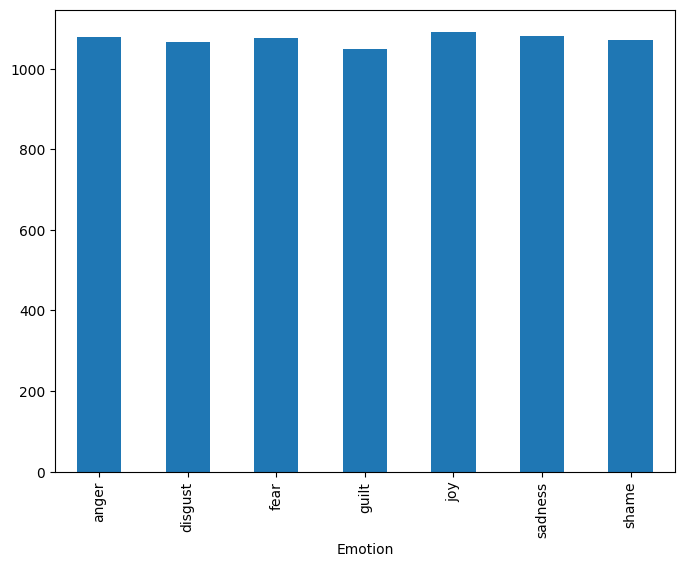

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
new_df.groupby('Emotion').Text.count().plot.bar(ylim=0)
plt.show()

In [8]:
new_df['Text']
new_df['Emotion']

0           joy
1          fear
2         anger
3       sadness
4       disgust
         ...   
7511      shame
7512      shame
7513       fear
7514      guilt
7515       fear
Name: Emotion, Length: 7516, dtype: object

In [12]:
def getTokenizedList(input_df):
    tokenizedList=[]
    for i in range(0,len(input_df)):
        curText = input_df[1].iloc[i]
        curText = curText.replace('\n', '')
        curTokenized = word_tokenize(curText)
        tokenizedList.append(curTokenized)
    #print(tokenizedList)
    tokenizedListWithoutPunct = []
    punctList = list(string.punctuation)
    for i in range(0,len(tokenizedList)):
        curList = tokenizedList[i]
        newList = [] #list without stopwords
        for word in curList:
            if (word.lower() not in punctList):
                newList.append(word.lower())
        tokenizedListWithoutPunct.append(newList)

    #print(tokenizedListWithoutPunct)

#stemming
    mystemmer = PorterStemmer()
    tokenizedStemmed=[]
    for i in range(0,len(tokenizedListWithoutPunct)):
        curList = tokenizedListWithoutPunct[i]
        newList = []
        for word in curList:
            newList.append(mystemmer.stem(word))
        tokenizedStemmed.append(newList)
    return tokenizedStemmed


In [13]:

def transformSentence(sent):
    s = []
    sent = sent.replace('\n','')
    sentTokenized = word_tokenize(sent)
    s.append(sentTokenized)
    sWithoutPunct = []
    punctList = list(string.punctuation)
    curSentList = s[0]
    newSentList = []
    for word in curSentList:
        if (word.lower() not in punctList):
            newSentList.append(word.lower())
    sWithoutPunct.append(newSentList)
    mystemmer = PorterStemmer()
    tokenizedStemmed = []
    for i in range(0, len(sWithoutPunct)):
        curList = sWithoutPunct[i]
        newList = []
        for word in curList:
            newList.append(mystemmer.stem(word))
        tokenizedStemmed.append(newList)
    return tokenizedStemmed


In [16]:
import nltk
nltk.download('punkt')
path = nltk.data.find('tokenizers/punkt')
print(path)

C:\Users\hp5cg\AppData\Roaming\nltk_data\tokenizers\punkt


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp5cg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
new_df['Text'] = getTokenizedList(df)
#new_df['Text']

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\hp5cg/nltk_data'
    - 'c:\\Users\\hp5cg\\AppData\\Local\\Programs\\Python\\Python313\\nltk_data'
    - 'c:\\Users\\hp5cg\\AppData\\Local\\Programs\\Python\\Python313\\share\\nltk_data'
    - 'c:\\Users\\hp5cg\\AppData\\Local\\Programs\\Python\\Python313\\lib\\nltk_data'
    - 'C:\\Users\\hp5cg\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
